# Run the whole deltas algorithm

In [86]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

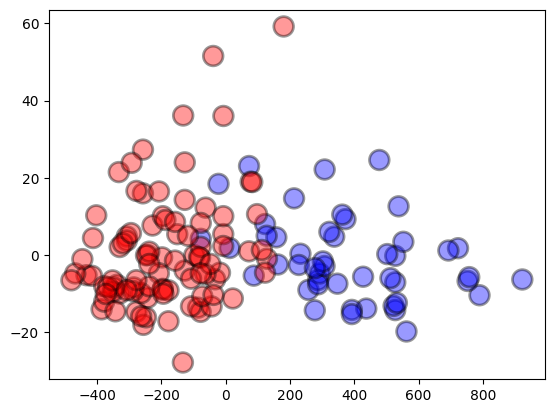

In [87]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing'}
dataset = datasets[3]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=False)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

clf


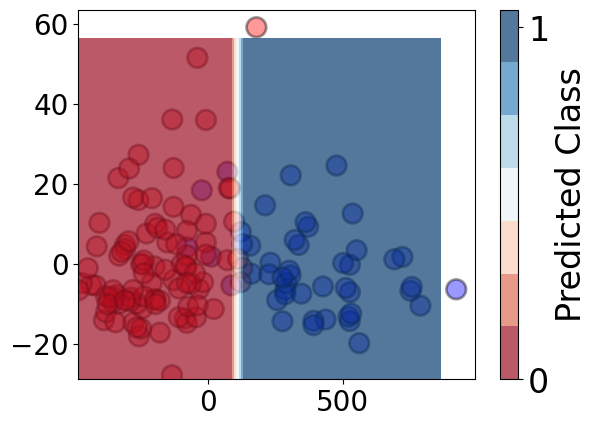

SMOTE


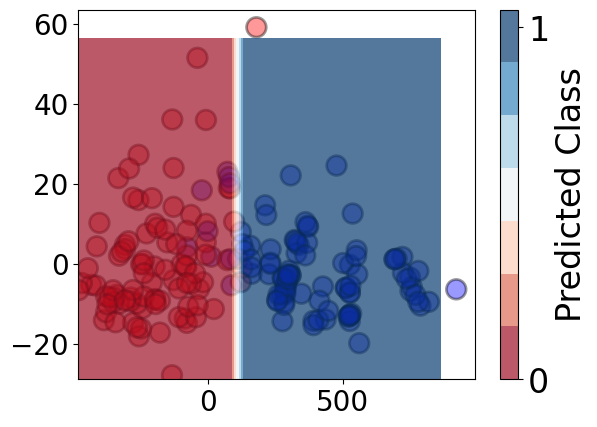

In [88]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


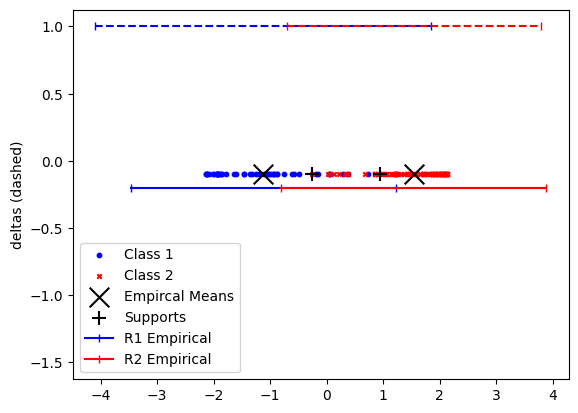

With budget 1000000 have found 3 viable downsampled solutions
Best solution found by removing 96 data points
Downsampled Data:


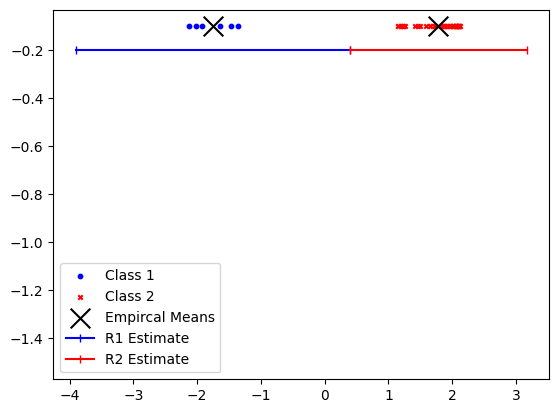

In [89]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf
).fit(X, y, alpha=1000, _print=True, _plot=True, max_trials=1000000, parallel=True)

## Plot training data information

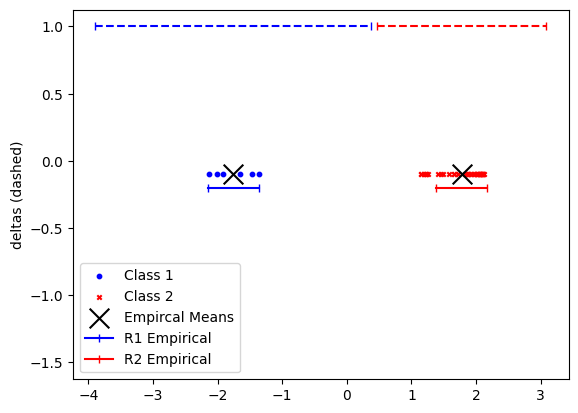

In [90]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [91]:
deltas_model.print_params()

Parameters
                R:  2.1318001010389565
                N1: 6
                N2: 40
                R1: 0.39318888725198464
                R2: 0.6357777822291062
                M:  2.506953991183333
                D:  3.5359206606644236
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.8611111111111112
SMOTE accuracy: 0.8611111111111112
deltas accuracy: 0.8888888888888888

original F1: 0.9019607843137256
SMOTE F1: 0.9019607843137256
deltas F1: 0.9199999999999999

original precision0: 0.8888888888888888
SMOTE precision0: 0.8888888888888888
deltas precision0: 0.9

original precision1: 0.8518518518518519
SMOTE precision1: 0.8518518518518519
deltas precision1: 0.8846153846153846

original


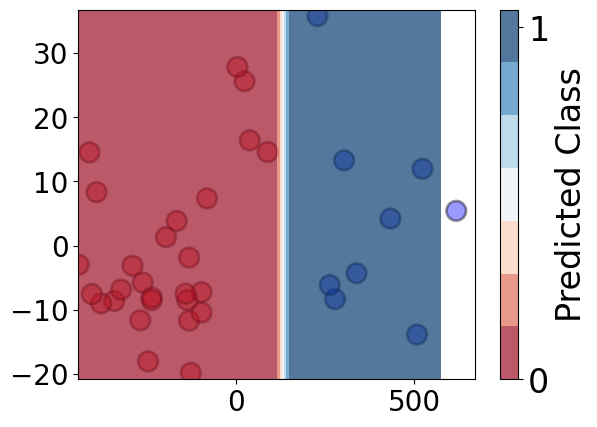

SMOTE


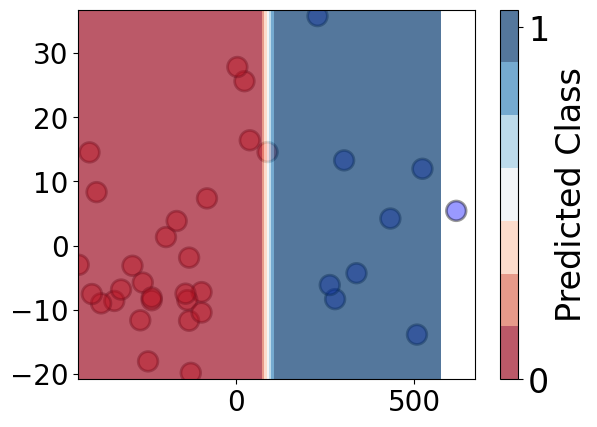

deltas


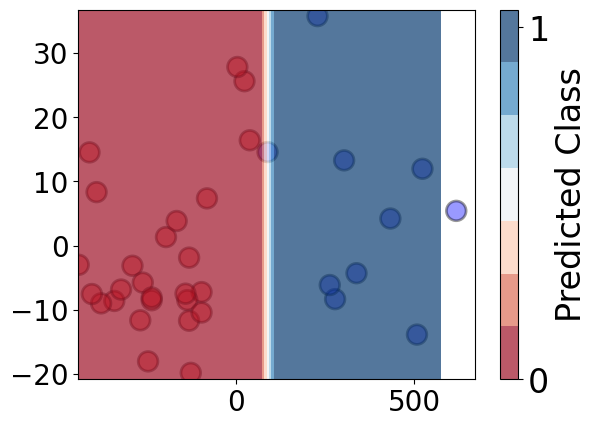

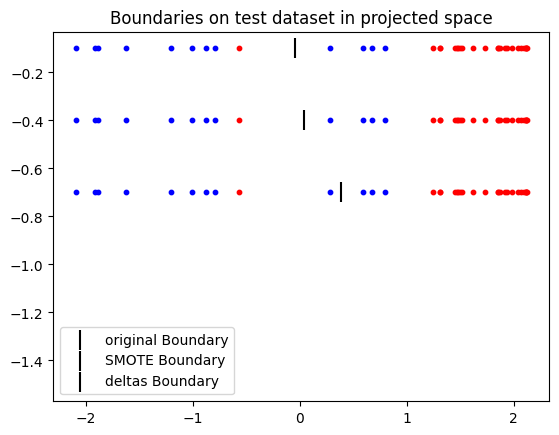

In [93]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
evaluation.eval_test(mdels, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])